# 9. Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting and plotting time series
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing COVID

### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# Create path, import data
path = r'/Users/caitlin/iCloud/Caitlin/COVID Data/Prepared Data/'

In [3]:
path

'/Users/caitlin/iCloud/Caitlin/COVID Data/Prepared Data/'

In [4]:
df = pd.read_pickle(os.path.join(path, 'COVID_final_updated_2.pkl'))

In [5]:
df.head(5)

date state_abbreviated  Total Cases  New Cases  \
case_death 5  2020-06-10                VT       1009.0       10.0   
           6  2020-04-28                MI      51401.0     1218.0   
           7  2020-05-03                NH       2518.0       89.0   
           8  2020-07-31                ND       6602.0      133.0   
           10 2020-09-24                AL     148606.0     2188.0   

               Total Deaths  New Deaths County_Name  FIPS_State  FIPS_County  \
case_death 5           54.0         0.0         NaN         NaN          NaN   
           6         4310.0       105.0         NaN         NaN          NaN   
           7           86.0         2.0         NaN         NaN          NaN   
           8          103.0         0.0         NaN         NaN          NaN   
           10        3894.0        13.0         NaN         NaN          NaN   

               order_code_home  ... Face_Masks_Required_in_Public  home_order  \
case_death 5               NaN  ...                           NaN         NaN   
           6               NaN  ...                           NaN         NaN   
           7               NaN  ...                           NaN         NaN   
           8               NaN  ...                           NaN         NaN   
           10              NaN  ...                           NaN         NaN   

                   Death Rate      Case Rate plus_14_days          State  \
case_death 5   Low Death Rate  Low Case Rate   2020-06-24        Vermont   
           6   Low Death Rate  Low Case Rate   2020-05-12       Michigan   
           7   Low Death Rate  Low Case Rate   2020-05-17  New Hampshire   
           8   Low Death Rate  Low Case Rate   2020-08-14   North Dakota   
           10  Low Death Rate  Low Case Rate   2020-10-08        Alabama   

              County           month Total Deaths by State  \
case_death 5     NaN       June 2020                 115.0   
           6     NaN      April 2020               11784.0   
           7     NaN        May 2020                 694.0   
           8     NaN       July 2020                1271.0   
           10    NaN  September 2020                6841.0   

              Total Cases by State  
case_death 5                6106.0  
           6              549471.0  
           7               40851.0  
           8               91560.0  
           10             345081.0  

[5 rows x 22 columns]

In [6]:
df.dtypes

date                                 datetime64[ns]
state_abbreviated                            object
Total Cases                                 float64
New Cases                                   float64
Total Deaths                                float64
New Deaths                                  float64
County_Name                                  object
FIPS_State                                  float64
FIPS_County                                 float64
order_code_home                             float64
Stay_at_Home_Order_Recommendation            object
order_code_mask                             float64
Face_Masks_Required_in_Public                object
home_order                                   object
Death Rate                                   object
Case Rate                                    object
plus_14_days                         datetime64[ns]
State                                        object
County                                       object
month       

In [7]:
type(df)

pandas.core.frame.DataFrame

### 2. Subsetting and plotting time series

In [8]:
# Extract only COVID cases data - see merge script
df_2 = df.loc['case_death']

In [9]:
df_2.shape

(14465, 22)

In [10]:
df_2.columns

Index(['date', 'state_abbreviated', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'County_Name', 'FIPS_State', 'FIPS_County',
       'order_code_home', 'Stay_at_Home_Order_Recommendation',
       'order_code_mask', 'Face_Masks_Required_in_Public', 'home_order',
       'Death Rate', 'Case Rate', 'plus_14_days', 'State', 'County', 'month',
       'Total Deaths by State', 'Total Cases by State'],
      dtype='object')

In [11]:
#Drop all but needed variables 
df_3 = df_2.drop(columns = ['state_abbreviated', 'Total Cases','Total Deaths',
       'New Deaths', 'County_Name', 'FIPS_State', 'FIPS_County',
       'order_code_home', 'Stay_at_Home_Order_Recommendation',
       'order_code_mask', 'Face_Masks_Required_in_Public', 'home_order',
       'Death Rate', 'Case Rate', 'plus_14_days', 'State', 'County', 'month',
       'Total Deaths by State', 'Total Cases by State'],)

In [12]:
# Check drop
df_3.head()

,date,New Cases
5,2020-06-10,10.0
6,2020-04-28,1218.0
7,2020-05-03,89.0
8,2020-07-31,133.0
10,2020-09-24,2188.0


In [13]:
df_3.dtypes

date         datetime64[ns]
New Cases           float64
dtype: object

In [14]:
# Create sub-set of data where dates are grouped by month for graph

df_4 = df_3.groupby(pd.Grouper(key='date',freq='M')).sum()

In [15]:
df_4

,New Cases
date,
2020-04-30,599952.0
2020-05-31,743995.0
2020-06-30,860681.0
2020-07-31,1937999.0
2020-08-31,1474966.0
2020-09-30,1218459.0
2020-10-31,1932972.0
2020-11-30,4430427.0
2020-12-31,5692678.0


In [16]:
df_4.dtypes

New Cases    float64
dtype: object

### Plot Variables

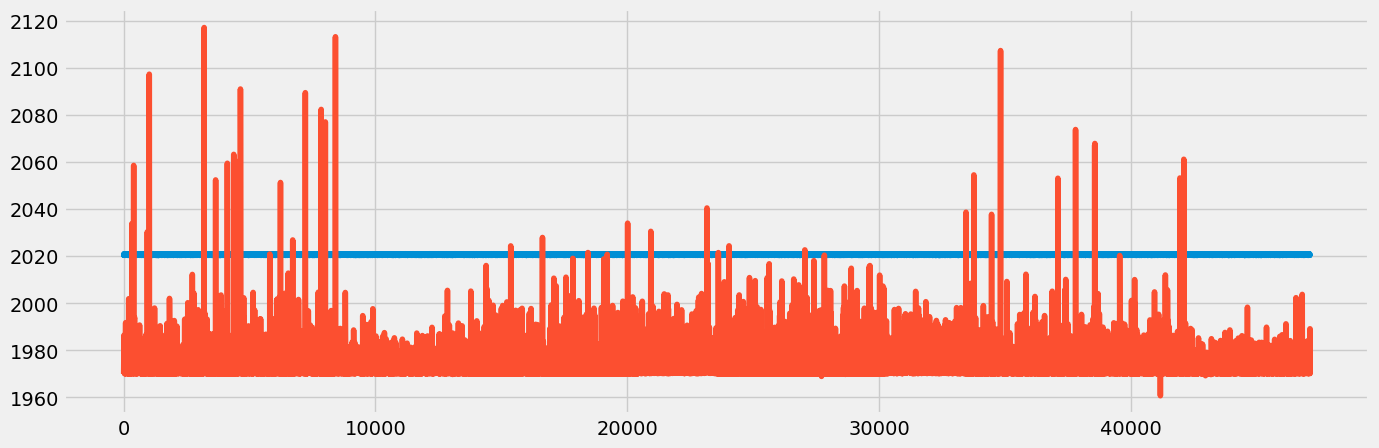

In [17]:
# Plot data as is - by day/month/year

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_3)

The monthly grouping makes it much easier to read and see the trends.

In [18]:
# Set the "Date" column as the index

from datetime import datetime

df_3['datetime'] = pd.to_datetime(df_3['date']) 
df_3 = df_3.set_index('datetime')
df_3.drop(['date'], axis=1, inplace=True) 
df_3.head()

,New Cases
datetime,
2020-06-10,10.0
2020-04-28,1218.0
2020-05-03,89.0
2020-07-31,133.0
2020-09-24,2188.0


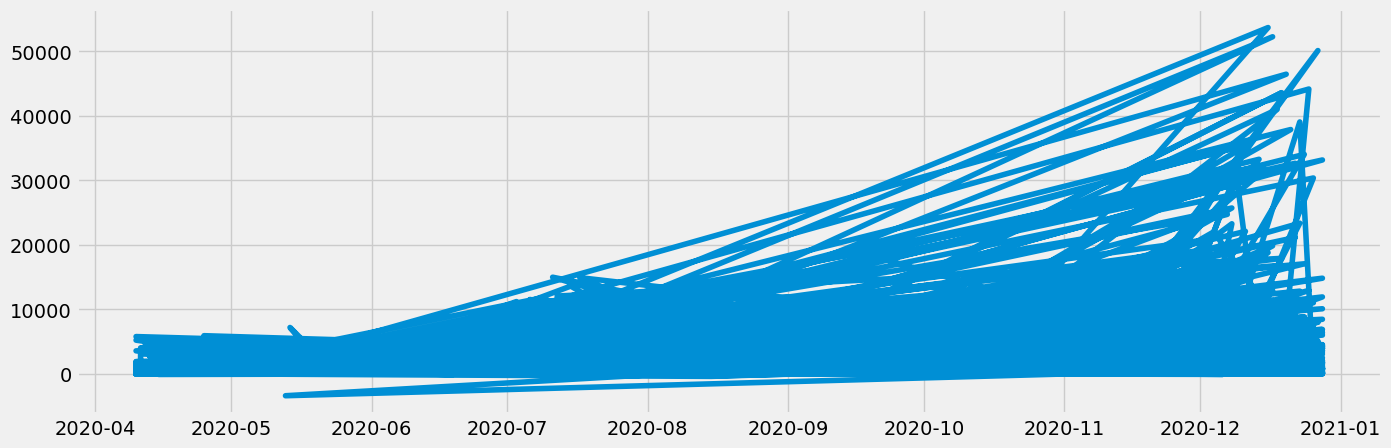

In [19]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_3)

Since the COVID case data is represented by day, the graph is difficult to read and interpret. A monthly grouping will likely be easier to read and better for the purpose of seeing the trend, so that will come next.

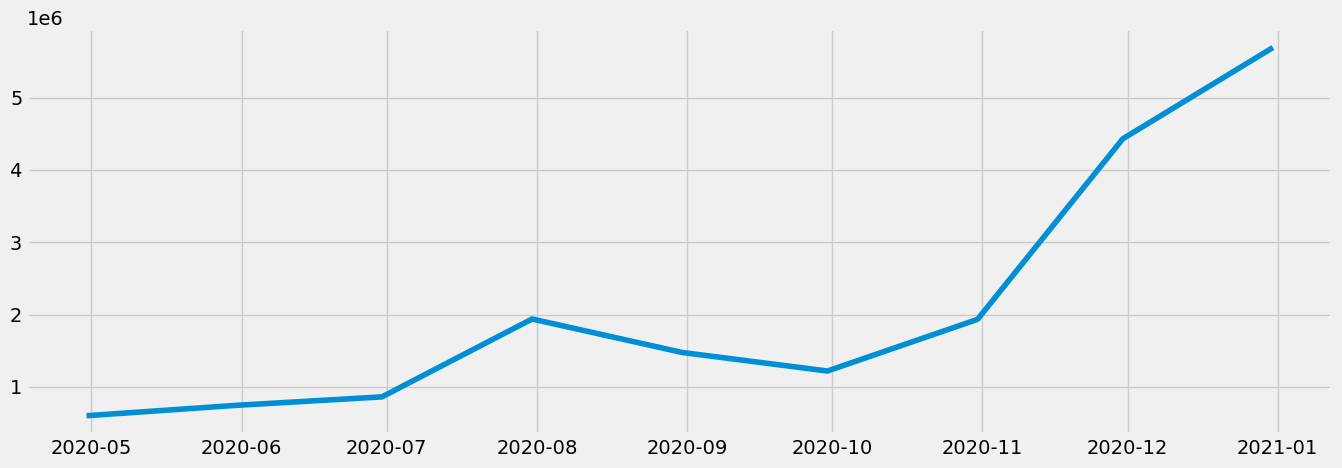

In [20]:
# Plot using month grouping and with date as index

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_4)

As the graph above illustrates, grouping by month is a much better fit for this dataset and the purpose of this exercise.

### 3. Time-series analysis: decomposition

In [21]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_3, model='additive', extrapolate_trend='freq', period=1)

I kept getting an error, so I had to add a period.

In [22]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

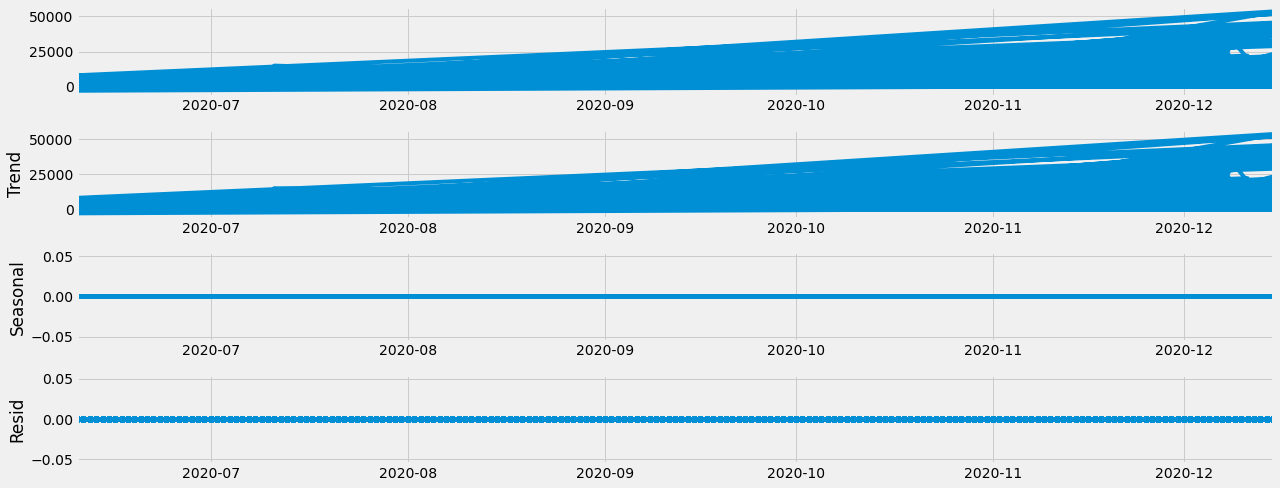

In [23]:
# Plot the separate components

decomposition.plot()
plt.show()

This type of graph is not the best fit for this data set (and also does not really address any of my questions), but for the purposes of this activity, it is an interesting graph. I will try again with month grouped data.

In [24]:
# Decompose the time series using an additive model - with month grouped data

decomposition_2 = sm.tsa.seasonal_decompose(df_4, model='additive', extrapolate_trend='freq', period=1)

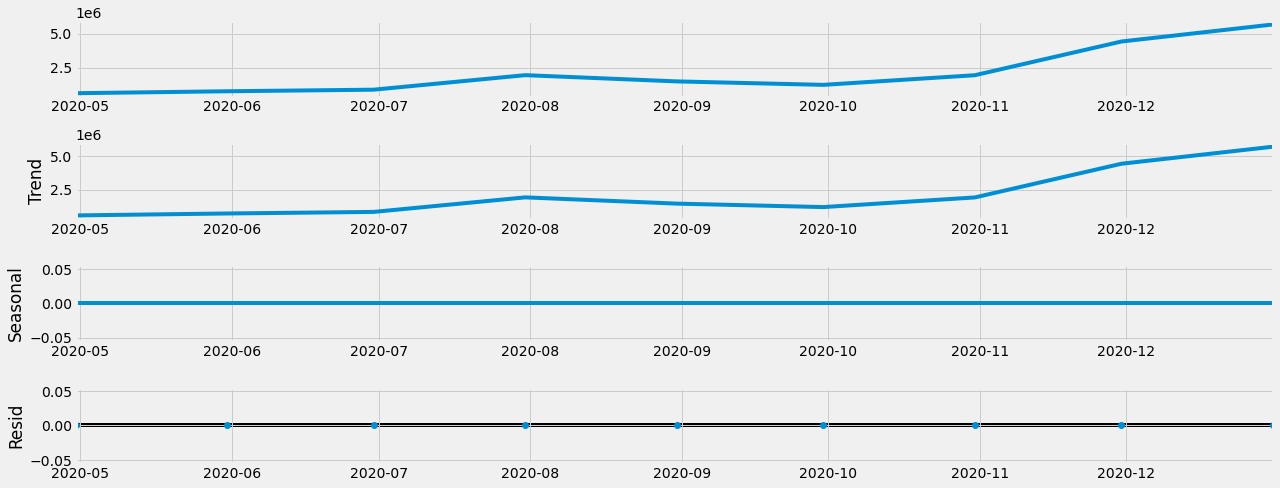

In [25]:
# Plot the separate components

decomposition_2.plot()
plt.show()

While this is better, it is clearly not the best fit for this dataset. My research question is looking at whether or not mandates impacted COVID cases and deaths. One thing that these graphs DO show is that for the time before vaccines were introduced (which is the time period I am focusing on), there is no seasonality, trends, or cycles to COVID cases. They simply rose over time.

### 4. Testing for stationarity

In [34]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_3['New Cases'])

Dickey-Fuller Stationarity test:
Test Statistic                  -119.690840
p-value                            0.000000
Number of Lags Used                0.000000
Number of Observations Used    14464.000000
Critical Value (1%)               -3.430802
Critical Value (5%)               -2.861740
Critical Value (10%)              -2.566876
dtype: float64


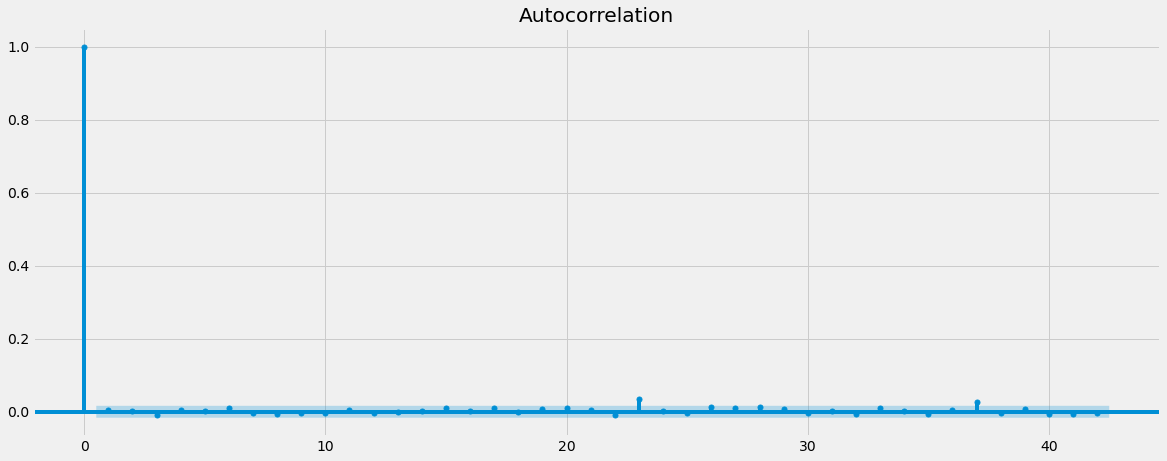

In [36]:
# Plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_3)
plt.show()

### 5. Stationarizing the Data

In [37]:
data_diff = df_3 - df_3.shift(1) 

In [38]:
data_diff.dropna(inplace = True) 

In [39]:
data_diff.head()

,New Cases
datetime,
2020-04-28,1208.0
2020-05-03,-1129.0
2020-07-31,44.0
2020-09-24,2055.0
2020-05-16,-1486.0


In [40]:
data_diff.columns

Index(['New Cases'], dtype='object')

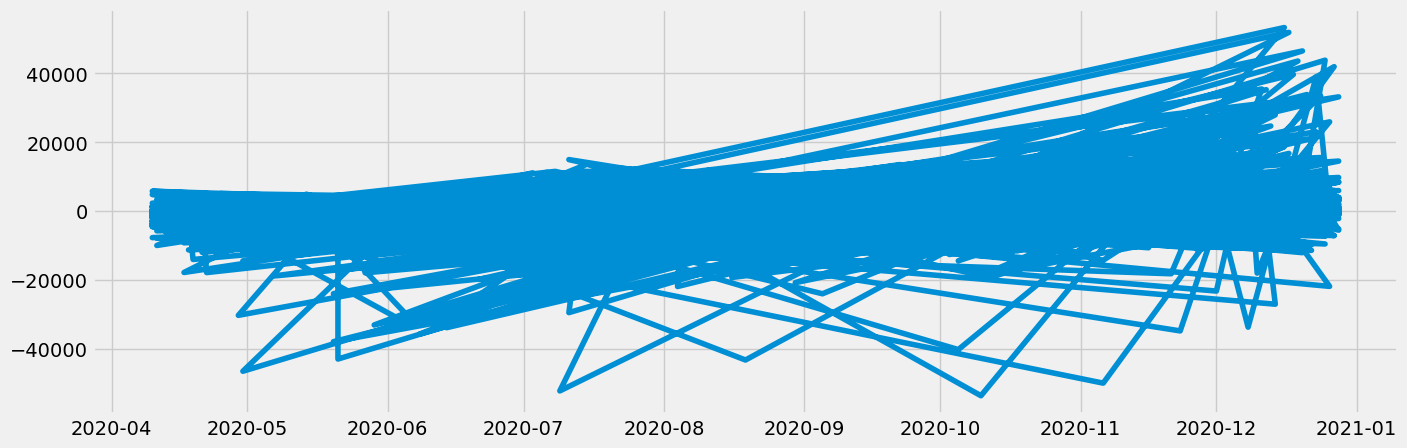

In [41]:
# Effect of differencing on curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [42]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                   -31.391454
p-value                            0.000000
Number of Lags Used               42.000000
Number of Observations Used    14421.000000
Critical Value (1%)               -3.430804
Critical Value (5%)               -2.861740
Critical Value (10%)              -2.566877
dtype: float64


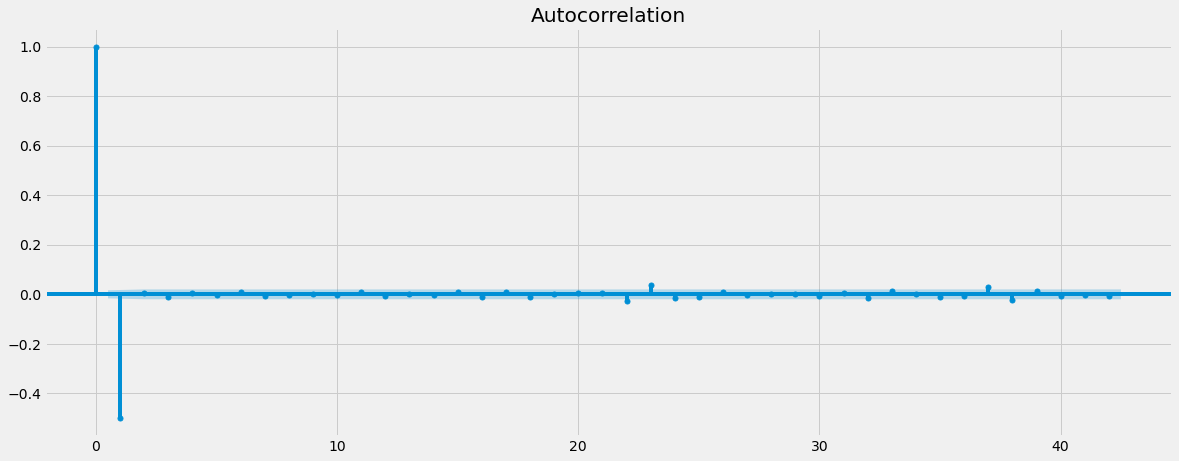

In [43]:
plot_acf(data_diff)
plt.show()

In [44]:
data_diff_2 = df_3 - df_3.shift(2) 

In [45]:
data_diff_2.dropna(inplace = True) 

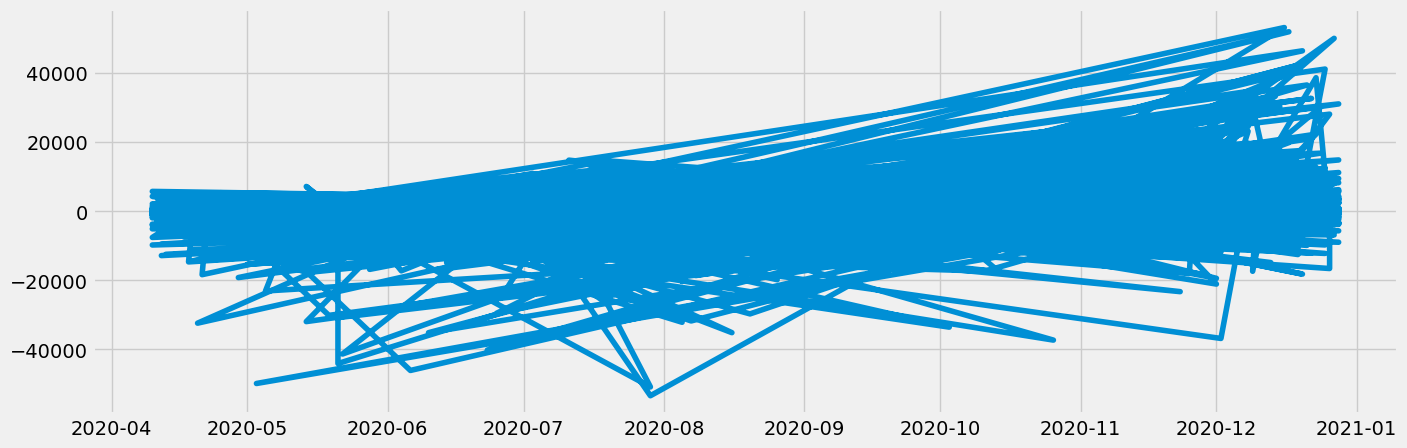

In [46]:
# Effect of differencing on curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [47]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                   -31.824265
p-value                            0.000000
Number of Lags Used               41.000000
Number of Observations Used    14421.000000
Critical Value (1%)               -3.430804
Critical Value (5%)               -2.861740
Critical Value (10%)              -2.566877
dtype: float64


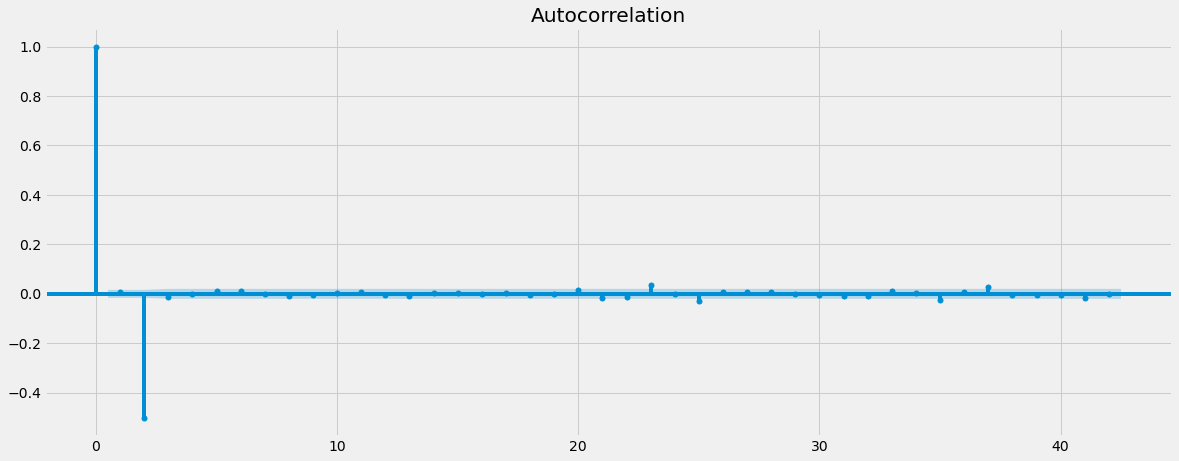

In [48]:
plot_acf(data_diff_2)
plt.show()

In [ ]:
data_diff_2 = df_3 - df_3.shift(2) 

In [ ]:
data_diff_2.dropna(inplace = True) 

In [ ]:
# Effect of differencing on curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)